# Creating HR data visualizations using Matplotlib and Seaborn

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd
import scipy

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the input file as dataframe
dei_data = pd.read_csv(filepath_or_buffer='records.csv')
dei_data.sample(n=5)

,ee#,employee_name,start_date,term_date,department,province,level,age,gender,ethnicity
4917,5918,Ashley Griffin,1998-08-08,2013-10-03,HR,Saskatchewan,Individual contributor,46,female,caucasian
2772,3773,Nicole Porter,1984-09-01,1991-09-20,Customer Service,Manitoba,Individual contributor,35,male,caucasian
154,1155,John Wilson,2006-12-16,2016-01-12,HR,Quebec,Individual contributor,45,male,caucasian
4891,5892,Andrew Jones,2007-05-26,2021-06-11,Sales,Prince Edward Island,Individual contributor,39,male,caucasian
2284,3285,Kristen Hamilton,2018-09-29,2022-05-21,Legal,New Brunswick,Individual contributor,30,male,caucasian


In [3]:
# categorical data profiling with formatted outputs
def category_profiling(df, columns):
    print(df.nunique())
    print("---")
    for col in columns:
        percentages = df[col].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
        print(percentages)
        print("---")

columns = ['department', 'province', 'level', 'gender', 'ethnicity']

category_profiling(dei_data, columns)

ee#              4999
employee_name    4999
start_date       4453
term_date        3994
department          8
province           13
level               1
age                49
gender              2
ethnicity           2
dtype: int64
---
department
Finance               13.4%
Sales                 13.1%
Project Management    12.9%
HR                    12.9%
Legal                 12.3%
Customer Service      12.3%
Marketing             11.7%
IT                    11.4%
Name: proportion, dtype: object
---
province
Prince Edward Island         8.3%
Ontario                      8.2%
Quebec                       8.1%
Alberta                      8.0%
Manitoba                     8.0%
New Brunswick                7.8%
Nunavut                      7.6%
Northwest Territories        7.6%
British Columbia             7.6%
Newfoundland and Labrador    7.3%
Saskatchewan                 7.3%
Yukon Territory              7.2%
Nova Scotia                  6.9%
Name: proportion, dtype: object
---
level

## Analysis of age

In [4]:
# simple data profiling on the age column
print(f"Age: min= {dei_data['age'].min()}")
print(f"Age: max= {dei_data['age'].max()}")
print(f"Age: avg= {dei_data['age'].mean().round(0)}")
print(f"Age: stdev= {dei_data['age'].std()}")
print(f"Age: 1st quart= {np.percentile(a= dei_data['age'], q= 25)}")
print(f"Age: 2nd quart= {np.percentile(a= dei_data['age'], q= 50)}")
print(f"Age: 3rd quart= {np.percentile(a= dei_data['age'], q= 75)}")

# advanced statistical measures
from scipy.stats import skew
print(f"Age: skew= {skew(dei_data['age'], axis=0, bias=True)}")

from scipy.stats import kurtosis
print(f"Age: kurtosis= {kurtosis(dei_data['age'], axis=0, fisher=True, bias=True)}")

Age: min= 22
Age: max= 70
Age: avg= 46.0
Age: stdev= 14.2659333010645
Age: 1st quart= 34.0
Age: 2nd quart= 46.0
Age: 3rd quart= 58.0
Age: skew= 0.0115941326647231
Age: kurtosis= -1.2170471514714758


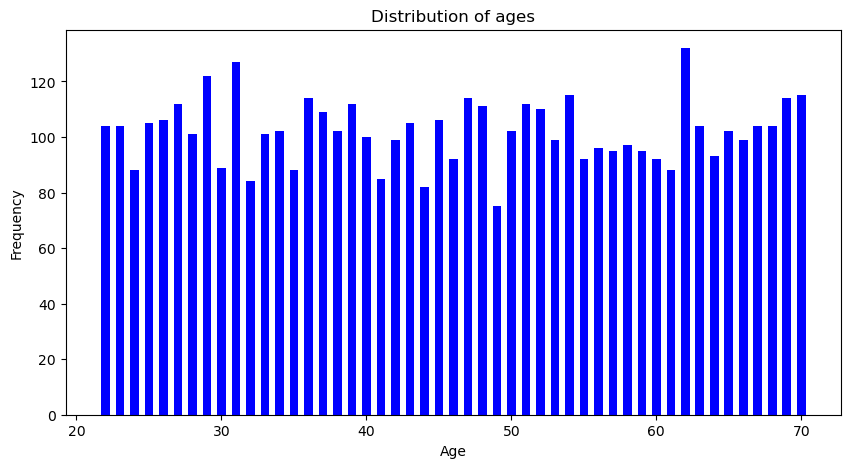

In [5]:
# distribution bar graph of ages
age_graph_data = dei_data['age'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(age_graph_data.index, age_graph_data.values, 
        color= 'blue', width= 0.6)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of ages')
plt.show()

In [6]:
# convert Age to numeric
dei_data['age'] = pd.to_numeric(dei_data['age'])

# creating age bins (e.g., 22-30, 31-40, 41-50, 51-60, 61-70)
bins= [22, 31, 41, 51, 61, 71]
labels= ['22-30', '31-40', '41-50', '51-60', '61-70']
dei_data['AgeGroup']= pd.cut(x= dei_data['age'], 
                             bins= bins,
                             labels= labels,
                             right= False)

# count of individuals per age group by gender
df_agg= dei_data.groupby(['AgeGroup', 'gender']).size().unstack(
    fill_value=0)
df_agg= df_agg.reset_index()
df_agg

gender,AgeGroup,female,male
0,22-30,309,622
1,31-40,348,691
2,41-50,337,634
3,51-60,317,686
4,61-70,316,739


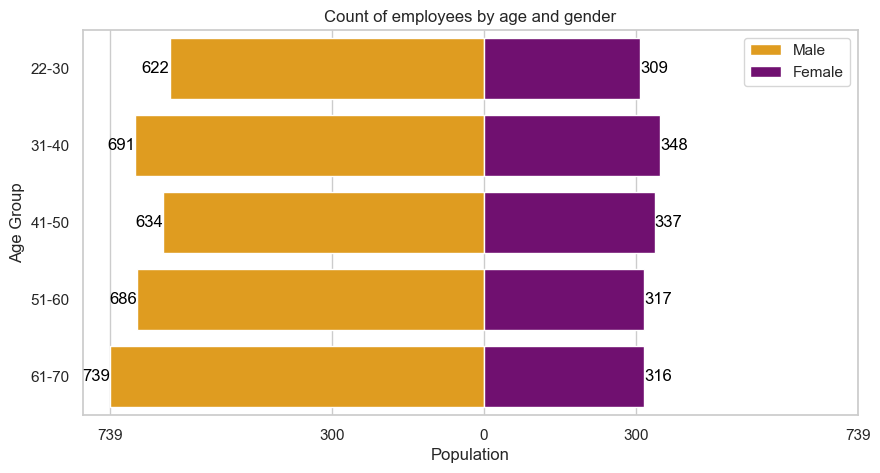

In [7]:
# distribution pyramid graph of ages
# setting up the figure and axes
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

# setting up the male population (in negative for left side)
sns.barplot(data= df_agg,
            x= -df_agg['male'],
            y= df_agg['AgeGroup'],
            color= 'orange',
            label= 'Male')

# setting up the female population
sns.barplot(data= df_agg,
            x= df_agg['female'],
            y= df_agg['AgeGroup'],
            color= 'purple',
            label= 'Female')

# Add data labels for male population
for index, value in enumerate(df_agg['male']):
    plt.text(-value, index, f'{value}', color='black', 
             ha='right', va='center')

# Add data labels for female population
for index, value in enumerate(df_agg['female']):
    plt.text(value, index, f'{value}', color='black', 
             ha='left', va='center')

# customizing the axes
plt.xlabel('Population')
plt.ylabel('Age Group')
plt.title('Count of employees by age and gender')
plt.legend()

# improving readability of x-axis labels
max_population = max(df_agg['male'].max(), df_agg['female'].max())
plt.xticks(ticks=[-max_population, -300, 
                  0, 300, max_population], 
           labels=[f'{max_population}', f'{300}', 
                   '0', f'{300}', f'{max_population}'])

# displaying the graph
plt.show()

## Tenure

In [8]:
dei_data.dtypes

ee#                 int64
employee_name      object
start_date         object
term_date          object
department         object
province           object
level              object
age                 int64
gender             object
ethnicity          object
AgeGroup         category
dtype: object

In [9]:
# ensuring that start and term dates are date type
dei_data['start_date'] = pd.to_datetime(dei_data['start_date'])
dei_data['term_date'] = pd.to_datetime(dei_data['term_date'])

# calculating tenure
dei_data['tenure'] = ((dei_data['term_date'] - dei_data['start_date']).dt.days
                       / 365.25).round(1)


In [10]:
# simple data profiling on the tenure column
print(f"Tenure: min= {dei_data['tenure'].min()}")
print(f"Tenure: max= {dei_data['tenure'].max()}")
print(f"Tenure: avg= {dei_data['tenure'].mean().round(0)}")
print(f"Tenure: stdev= {dei_data['tenure'].std()}")
print(f"Tenure: 1st quart= {np.percentile(a= dei_data['tenure'], q= 25)}")
print(f"Tenure: 2nd quart= {np.percentile(a= dei_data['tenure'], q= 50)}")
print(f"Tenure: 3rd quart= {np.percentile(a= dei_data['tenure'], q= 75)}")

Tenure: min= 0.0
Tenure: max= 53.4
Tenure: avg= 14.0
Tenure: stdev= 12.057963992259351
Tenure: 1st quart= 3.6
Tenure: 2nd quart= 10.3
Tenure: 3rd quart= 21.2


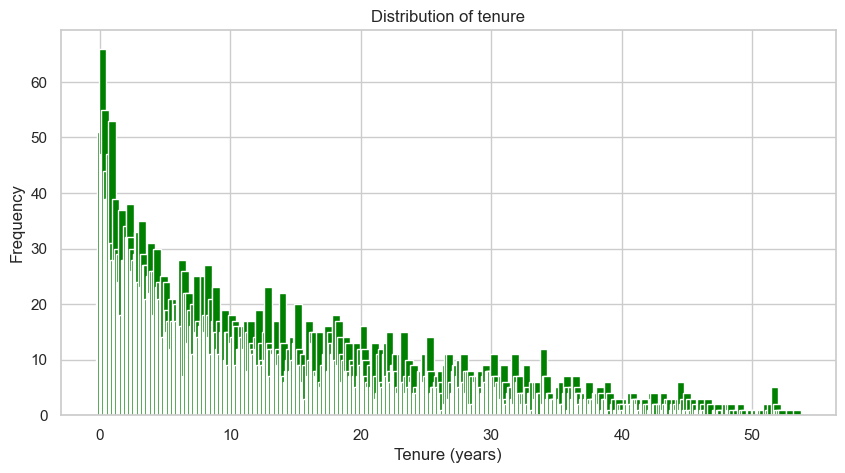

In [12]:
# distribution bar graph of tenure
tenure_graph_data = dei_data['tenure'].value_counts().sort_index()

plt.figure(figsize= (10,5))
plt.bar(tenure_graph_data.index, tenure_graph_data.values,
        color= 'green', width= 0.6)
plt.xlabel('Tenure (years)')
plt.ylabel('Frequency')
plt.title('Distribution of tenure')
plt.show()

In [13]:
# creating tenure bins (e.g., < 1 year, 1-3, 3-5)
tenure_bins= [0, 1.1, 3.1, 5.1, 10.1, 15.1, 30.1, 54]
tenure_labels= ['< 1 year', '1-3 years', '3-5 years', '5-10 years',
                '10-15 years', '15-30 years', '30+ years']
dei_data['TenureGroup']= pd.cut(x= dei_data['tenure'],
                                 bins= tenure_bins,
                                 labels= tenure_labels,
                                 right= False)

# count of individuals per tenure group by gender
tenure_agg= dei_data.groupby(['TenureGroup', 'gender']).size().unstack(
    fill_value=0)
tenure_agg= tenure_agg.reset_index()
tenure_agg

gender,TenureGroup,female,male
0,< 1 year,170,325
1,1-3 years,194,410
2,3-5 years,152,343
3,5-10 years,288,586
4,10-15 years,219,417
5,15-30 years,419,867
6,30+ years,185,424


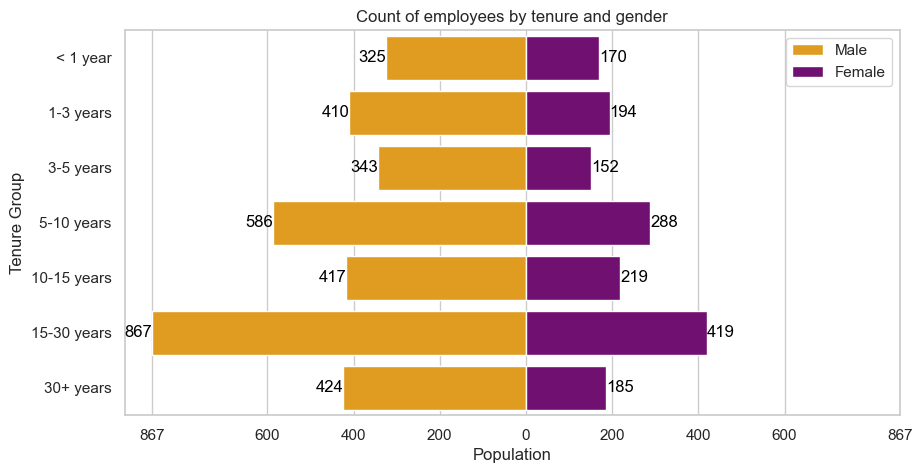

In [14]:
# distribution pyramid of tenure
# setting up the figure and axes
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

# setting up the male population (in negative for left side)
sns.barplot(data= tenure_agg,
            x= -tenure_agg['male'],
            y= tenure_agg['TenureGroup'],
            color= 'orange',
            label= 'Male')

# setting up the female population
sns.barplot(data= tenure_agg,
            x= tenure_agg['female'],
            y= tenure_agg['TenureGroup'],
            color= 'purple',
            label= 'Female')

# Add data labels for male population
for index, value in enumerate(tenure_agg['male']):
    plt.text(-value, index, f'{value}', color='black', 
             ha='right', va='center')

# Add data labels for female population
for index, value in enumerate(tenure_agg['female']):
    plt.text(value, index, f'{value}', color='black', 
             ha='left', va='center')

# customizing the axes
plt.xlabel('Population')
plt.ylabel('Tenure Group')
plt.title('Count of employees by tenure and gender')
plt.legend()

# improving readability of x-axis labels
max_population = max(tenure_agg['male'].max(), tenure_agg['female'].max())
plt.xticks(ticks=[-max_population, -600, -400, -200, 
                  0, 200, 400, 600, max_population], 
           labels=[f'{max_population}', f'{600}', f'{400}', f'{200}',
                   '0', f'{200}',f'{400}',f'{600}', f'{max_population}'])

# displaying the graph
plt.show()

In [23]:
dei_data.sample(n=5)

,ee#,employee_name,start_date,term_date,department,province,level,age,gender,ethnicity,AgeGroup,tenure,TenureGroup,TermYear,StartYear
243,1244,Terri Cunningham,1980-02-28,2023-06-01,Marketing,Nova Scotia,Individual contributor,33,male,asian,31-40,43.3,30+ years,2023,1980
716,1717,Andrew Bradley,2007-02-17,2016-07-26,Legal,New Brunswick,Individual contributor,49,female,caucasian,41-50,9.4,5-10 years,2016,2007
4392,5393,Laurie Allen,1995-06-20,1996-12-07,Marketing,Quebec,Individual contributor,38,female,caucasian,31-40,1.5,1-3 years,1996,1995
4176,5177,Shannon Dixon,1996-03-24,2014-09-19,IT,Northwest Territories,Individual contributor,68,male,caucasian,61-70,18.5,15-30 years,2014,1996
3563,4564,Christine Adams,1985-10-23,2000-09-15,Sales,Yukon Territory,Individual contributor,43,female,caucasian,41-50,14.9,10-15 years,2000,1985


In [22]:
# creating new columns with hiring & term years
dei_data['TermYear'] = dei_data['term_date'].dt.year
dei_data['StartYear'] = dei_data['start_date'].dt.year

In [25]:
# creating counts of new hires per year
hiring_agg= dei_data.groupby(['StartYear']).size()
hiring_agg= hiring_agg.reset_index()
hiring_agg.sample(n=5)

,StartYear,0
0,1970,94
1,1971,99
2,1972,91
3,1973,100
4,1974,98
5,1975,73
6,1976,75
7,1977,88
8,1978,90
9,1979,77


In [26]:
# creating counts of terminations per year
terms_agg= dei_data.groupby(['TermYear']).size()
terms_agg= terms_agg.reset_index()
terms_agg.sample(n=5)

,TermYear,0
37,2007,113
54,2024,283
0,1970,1
17,1987,23
47,2017,199
